In [43]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt

def read_msa(path):
    alignment = AlignIO.read(open(path), "fasta")
    print(alignment)
    l=alignment.get_alignment_length()
    msa_matrix=np.zeros([3,l],dtype=str)
    for i,record in enumerate(alignment):
        for pos,nuc in enumerate(record.seq):
            msa_matrix[i][pos]=nuc
    return msa_matrix

def get_evidences_distributions(msa_matrix):
    l=len(msa_matrix[0])
    e_distribution = np.zeros(l, dtype=int)

    for pos,array in enumerate(msa_matrix[0]):
        nuc_assembly=msa_matrix[0,pos]
        nuc_first_ref=msa_matrix[1,pos]
        nuc_second_ref=msa_matrix[2,pos]
        if nuc_assembly!='-' and nuc_first_ref!='-' and nuc_second_ref!='-':
            if (nuc_assembly!=nuc_first_ref and nuc_assembly!=nuc_second_ref) or (nuc_assembly==nuc_first_ref and nuc_assembly==nuc_second_ref):
                continue
            elif nuc_assembly==nuc_first_ref and nuc_assembly!=nuc_second_ref:
                e_distribution[pos]=1
            elif nuc_assembly!=nuc_first_ref and nuc_assembly==nuc_second_ref:
                e_distribution[pos]=2

    return e_distribution
def viterbi(y, A, B, pi):
    """
        viterbi algorithm
        :param y: observation sequence
        :param A: the transition matrix
        :param B: the emission matrix
        :param pi: the initial probability distribution
    """
    N = B.shape[0]
    x_seq = np.zeros([N, 0])
    V = np.log(B[:, y[0]]) + np.log(pi)
    
    # forward to compute the optimal value function V
    for y_ in y[1:]:
        _V = np.log(np.tile(B[:, y_], reps=[N, 1]).T) + np.log(A.T) + np.tile(V, reps=[N, 1])
        x_ind = np.argmax(_V, axis=1)
        x_seq = np.hstack([x_seq, np.c_[x_ind]])
        V = _V[np.arange(N), x_ind]
    x_T = np.argmax(V)

    # backward to fetch optimal sequence
    x_seq_opt, i = np.zeros(x_seq.shape[1]+1), x_seq.shape[1]
    prev_ind = x_T
    while i >= 0:
        x_seq_opt[i] = prev_ind
        i -= 1
        prev_ind = x_seq[int(prev_ind), i]
    return x_seq_opt
    
initial_p={"A":0.5,"B":0.5}

transition_p_froma={"A":0.999,"B":0.001}
transition_p_fromb={"A":0.001,"B":0.999}

emission_p_froma={".":0.949,"a":0.05,"b":0.001}
emission_p_fromb={".":0.949,"a":0.001,"b":0.05}

ip_np=np.array(list(initial_p.values()))
tp_np=np.array([list(transition_p_froma.values()),
                list(transition_p_fromb.values())])
ep_np=np.array([list(emission_p_froma.values()),
                list(emission_p_fromb.values())])

print(ip_np)
print(tp_np)
print(ep_np)

[0.5 0.5]
[[0.999 0.001]
 [0.001 0.999]]
[[0.949 0.05  0.001]
 [0.949 0.001 0.05 ]]


In [44]:
file=f'C:/Users/giaco/Documents/GitHub/recombinant_population_analysis/results/msa/clones/P2_C1_msa.fasta'

msa_matrix=read_msa(file)

e_distribution = get_evidences_distributions(msa_matrix)



Alignment with 3 rows and 142281 columns
--------------------------------------------...--- C1_P2
-tctttgtcaagtgctgcatgaaaaatttacaatcttgtatggt...ctt EM11
ctctttgtcaagtgctgcatgaaaaatttacaagcttgtatggt...ttc EM60


In [45]:
np.set_printoptions(threshold=np.inf)

print(e_distribution)
print(e_distribution.shape)

string=''
for i in e_distribution:
    if i==0:
        string+="."
    else:
        string+=str(i)

print(string)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [46]:
o = viterbi(e_distribution, tp_np, ep_np, ip_np)

print(o)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

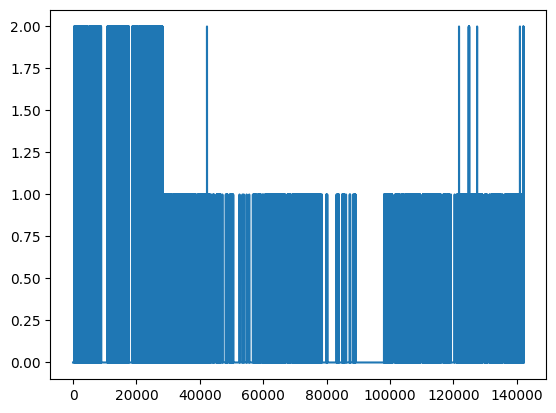

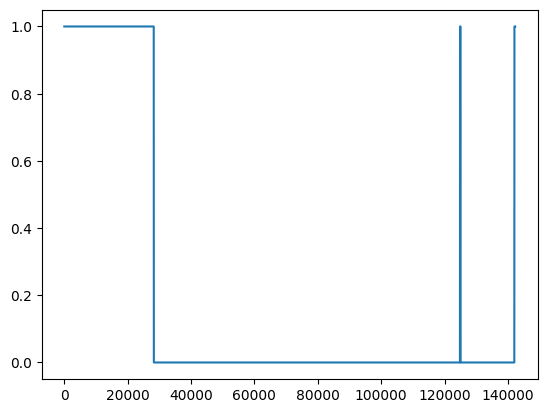

In [42]:

plt.plot(e_distribution)
plt.show()
plt.plot(o)
plt.show()